# Training models on the first company's dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
df = pd.read_csv('/content/EGX_DLY_COMI, 1D.csv')

In [29]:
# seeing the data
print(df.head())   # the time is represented as timestamp

        time      open      high       low     close
0  989910000  0.839019  0.839019  0.827202  0.831220
1  989996400  0.827202  0.836419  0.823184  0.826020
2  990082800  0.827202  0.827202  0.820111  0.824366
3  990342000  0.815621  0.821293  0.815385  0.816566
4  990428400  0.813257  0.850836  0.809476  0.831456


In [30]:
# data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5529 non-null   int64  
 1   open    5529 non-null   float64
 2   high    5529 non-null   float64
 3   low     5529 non-null   float64
 4   close   5529 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 216.1 KB
None


In [31]:
# statistics of the data
print(df.describe())

               time         open         high          low        close
count  5.529000e+03  5529.000000  5529.000000  5529.000000  5529.000000
mean   1.347961e+09    15.899816    16.113148    15.704246    15.912883
std    2.083471e+08    16.095197    16.328115    15.898890    16.119097
min    9.899100e+08     0.602676     0.602676     0.600312     0.602203
25%    1.165997e+09     3.450615     3.545152     3.357595     3.469266
50%    1.349338e+09     7.604309     7.734061     7.476685     7.619199
75%    1.528272e+09    29.916029    30.390631    29.518197    29.916029
max    1.707984e+09    89.000000    95.480003    86.000000    89.000000


In [ ]:
# we don't need to handle missing values or scaling here, since info() showed there are no Null values here, and
# descibe() showed that the scales of the 'open', 'high', and 'low' are similar
# however, we can check for outliers

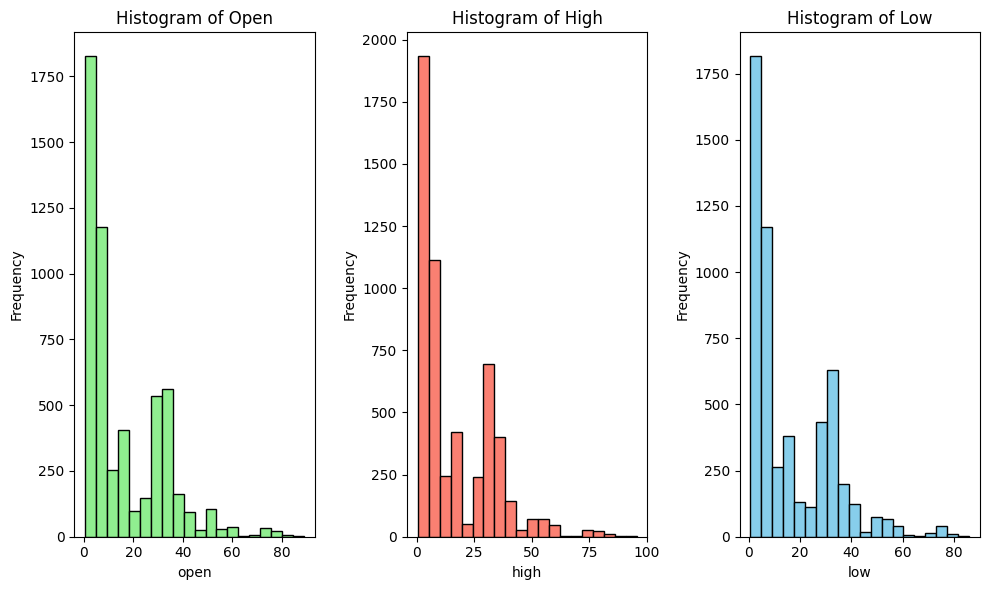

In [32]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(df['open'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('open')
plt.ylabel('Frequency')
plt.title('Histogram of Open')

plt.subplot(1, 3, 2)
plt.hist(df['high'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('high')
plt.ylabel('Frequency')
plt.title('Histogram of High')

plt.subplot(1, 3, 3)
plt.hist(df['low'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('low')
plt.ylabel('Frequency')
plt.title('Histogram of Low')

plt.tight_layout()
plt.show()

In [33]:
# the histograms along with the output of describe() show that
# most of the prices are below 35

mean_open = df['open'].mean()
std_open = df['open'].std()

mean_high = df['high'].mean()
std_high = df['high'].std()

mean_low = df['low'].mean()
std_low = df['low'].std()

# getting outliers for the open, high, and low columns
outliers_open = df[(df['open'] < mean_open - 2 * std_open) | (df['open'] > mean_open + 2 * std_open)]
outliers_high = df[(df['high'] < mean_high - 2 * std_high) | (df['high'] > mean_high + 2 * std_high)]
outliers_low = df[(df['low'] < mean_low - 2 * std_low) | (df['low'] > mean_low + 2 * std_low)]

print("Outliers in 'open' column:", len(outliers_open))
print("Outliers in 'high' column:", len(outliers_high))
print("Outliers in 'low' column:", len(outliers_low))

Outliers in 'open' column: 254
Outliers in 'high' column: 255
Outliers in 'low' column: 255


In [ ]:
# I decided not to handle the outliers because they are low in quantity and in gravity
# They also haven't decreased the error values significantly after removing them

#outliers = pd.concat([outliers_open, outliers_high, outliers_low])

In [ ]:
#df = df.drop(outliers.index)
#print(df.describe())

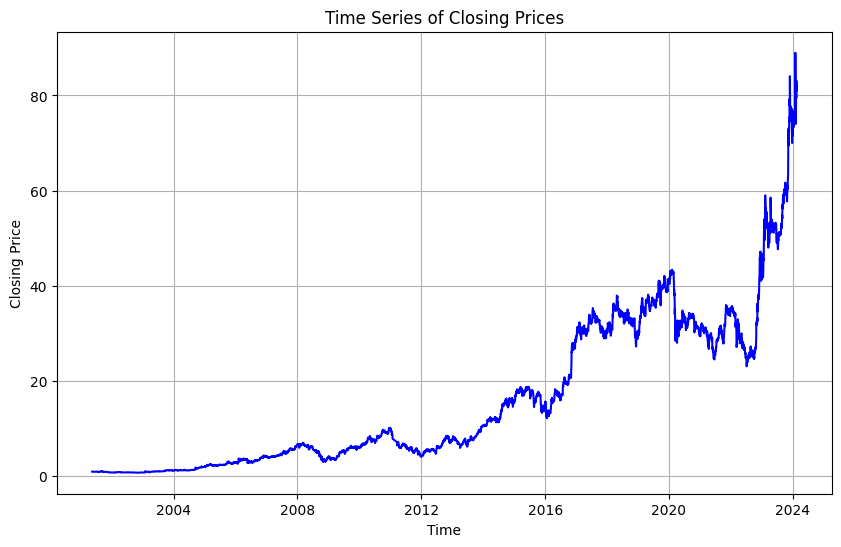

In [38]:
df['time'] = [datetime.fromtimestamp(x) for x in df['time']]
df['time'] = pd.to_datetime(df['time'])

# Plot the time series of closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['close'], color='blue')
plt.title('Time Series of Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# the time series graph shows that the closing price increases with the time of
# the stock which is predictable

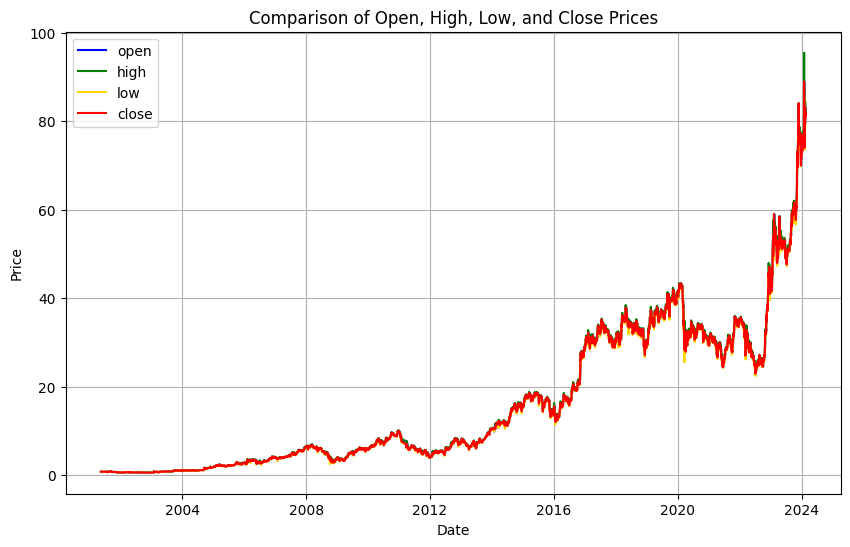

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['open'], label='open', color='blue')
plt.plot(df['time'], df['high'], label='high', color='green')
plt.plot(df['time'], df['low'], label='low', color='gold')
plt.plot(df['time'], df['close'], label='close', color='red')
plt.title('Comparison of Open, High, Low, and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# the below graph shows that open, high, low, and close columns are following the same trend which
# indicates that these stocks are consisent and stable

In [44]:
# we can show this mathematically
correlation_matrix = df[['open', 'high', 'low', 'close']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract the correlation coefficients between 'Open', 'High', and 'Low' columns with 'Close' column
open_close_corr = correlation_matrix.loc['open', 'close']
high_close_corr = correlation_matrix.loc['high', 'close']
low_close_corr = correlation_matrix.loc['low', 'close']

# Print the correlation coefficients
print("\nCorrelation between Open and Close:", open_close_corr)
print("Correlation between High and Close:", high_close_corr)
print("Correlation between Low and Close:", low_close_corr)

Correlation Matrix:
           open      high       low     close
open   1.000000  0.999756  0.999798  0.999627
high   0.999756  1.000000  0.999692  0.999848
low    0.999798  0.999692  1.000000  0.999813
close  0.999627  0.999848  0.999813  1.000000

Correlation between Open and Close: 0.9996271736193851
Correlation between High and Close: 0.9998479213741992
Correlation between Low and Close: 0.9998129664422851


In [45]:
# Handling the 'time' column
print('Years:', df['time'].dt.year.unique())
print('Months:', df['time'].dt.month.unique())
print('Days:', df['time'].dt.day.unique())
print('Hours:', df['time'].dt.hour.unique())
print('Minutes:', df['time'].dt.minute.unique())
print('Seconds:', df['time'].dt.second.unique())

Years: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Months: [ 5  6  7  8  9 10 11 12  1  2  3  4]
Days: [15 16 17 20 21 22 23 24 27 28 29 30 31  3  5  6  7 10 11 12 13 14 18 19
 25 26  2  4  8  9  1]
Hours: [7 8]
Minutes: [0]
Seconds: [0]


In [46]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
print(df.head())

                 time      open      high       low     close  day  month  \
0 2001-05-15 07:00:00  0.839019  0.839019  0.827202  0.831220   15      5   
1 2001-05-16 07:00:00  0.827202  0.836419  0.823184  0.826020   16      5   
2 2001-05-17 07:00:00  0.827202  0.827202  0.820111  0.824366   17      5   
3 2001-05-20 07:00:00  0.815621  0.821293  0.815385  0.816566   20      5   
4 2001-05-21 07:00:00  0.813257  0.850836  0.809476  0.831456   21      5   

   year  
0  2001  
1  2001  
2  2001  
3  2001  
4  2001  


In [47]:
# Now to split the data to training and testing, and input an output
X = df[['day', 'month', 'year', 'open', 'high', 'low']]
Y = df['close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

In [48]:
# choosing the models
model_1 = LinearRegression()
model_2 = GradientBoostingRegressor()
model_3 = MLPRegressor()

In [49]:
model_1.fit(X_train, Y_train)
Y_pred = model_1.predict(X_test)
print("Linear Regressor mae:", mean_absolute_error(Y_test, Y_pred))
print("Linear Regressor mad:", np.mean(np.abs(Y_test - Y_pred)))
print("Linear Regressor mse:", mean_squared_error(Y_test, Y_pred))

Linear Regressor mae: 0.07436126801302785
Linear Regressor mad: 0.07436126801302785
Linear Regressor mse: 0.034339248333323365


In [50]:
model_2.fit(X_train, Y_train)
Y_pred = model_2.predict(X_test)
print("Gradient Boosting Regressor mae:", mean_absolute_error(Y_test, Y_pred))
print("Gradient Boosting Regressor mad:", np.mean(np.abs(Y_test - Y_pred)))
print("Gradient Boosting Regressor mse:", mean_squared_error(Y_test, Y_pred))

Gradient Boosting Regressor mae: 0.1303141899187994
Gradient Boosting Regressor mad: 0.1303141899187994
Gradient Boosting Regressor mse: 0.0746213798224875


In [51]:
model_3.fit(X_train, Y_train)
Y_pred = model_3.predict(X_test)
print("Multi-layer Perceptron Regressor mae:", mean_absolute_error(Y_test, Y_pred))
print("Multi-layer Perceptron mad:", np.mean(np.abs(Y_test - Y_pred)))
print("Multi-layer Perceptron mse:", mean_squared_error(Y_test, Y_pred))

Multi-layer Perceptron Regressor mae: 0.20176795400579256
Multi-layer Perceptron mad: 0.20176795400579256
Multi-layer Perceptron mse: 0.10460918384856299


# Predicting another company's prices

In [56]:
# The results above show that the Linear regressor is best for this task
# We can try to predict another company's closing price with it now
df2 = pd.read_csv('/content/EGX_DLY_ISPH, 1D.csv')
df2['time'] = [datetime.fromtimestamp(x) for x in df2['time']]
df2['time'] = pd.to_datetime(df2['time'])
df2['day'] = df2['time'].dt.day
df2['month'] = df2['time'].dt.month
df2['year'] = df2['time'].dt.year
X2 = df2[['day', 'month', 'year', 'open', 'high', 'low']]
Y2 = df2['close']

Y_pred2 = model_1.predict(X2)
print("Performance on EGX_DLY_ISPH stocks")
print("Linear Regressor mae:", mean_absolute_error(Y2, Y_pred2))
print("Linear Regressor mad:", np.mean(np.abs(Y2 - Y_pred2)))
print("Linear Regressor mse:", mean_squared_error(Y2, Y_pred2))

Performance on EGX_DLY_ISPH stocks
Linear Regressor mae: 0.046303452762722845
Linear Regressor mad: 0.046303452762722845
Linear Regressor mse: 0.0034925741775972347


In [57]:
df2 = pd.read_csv('/content/EGX_DLY_EGX30, 1D.csv')
df2['time'] = [datetime.fromtimestamp(x) for x in df2['time']]
df2['time'] = pd.to_datetime(df2['time'])
df2['day'] = df2['time'].dt.day
df2['month'] = df2['time'].dt.month
df2['year'] = df2['time'].dt.year
X2 = df2[['day', 'month', 'year', 'open', 'high', 'low']]
Y2 = df2['close']

Y_pred2 = model_1.predict(X2)
print("Performance on EGX_DLY_EGX30 stocks")
print("Linear Regressor mae:", mean_absolute_error(Y2, Y_pred2))
print("Linear Regressor mad:", np.mean(np.abs(Y2 - Y_pred2)))
print("Linear Regressor mse:", mean_squared_error(Y2, Y_pred2))

Performance on EGX_DLY_EGX30 stocks
Linear Regressor mae: 38.66877419276157
Linear Regressor mad: 38.66877419276157
Linear Regressor mse: 3810.039518008497


In [58]:
df2 = pd.read_csv('/content/EGX_DLY_EMFD, 1D.csv')
df2['time'] = [datetime.fromtimestamp(x) for x in df2['time']]
df2['time'] = pd.to_datetime(df2['time'])
df2['day'] = df2['time'].dt.day
df2['month'] = df2['time'].dt.month
df2['year'] = df2['time'].dt.year
X2 = df2[['day', 'month', 'year', 'open', 'high', 'low']]
Y2 = df2['close']

Y_pred2 = model_1.predict(X2)
print("Performance on EGX_DLY_EMFD stocks")
print("Linear Regressor mae:", mean_absolute_error(Y2, Y_pred2))
print("Linear Regressor mad:", np.mean(np.abs(Y2 - Y_pred2)))
print("Linear Regressor mse:", mean_squared_error(Y2, Y_pred2))

Performance on EGX_DLY_EMFD stocks
Linear Regressor mae: 0.031578903521117564
Linear Regressor mad: 0.031578903521117564
Linear Regressor mse: 0.0015614957887738325
